# Boosting and Stacking Exercises

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [3]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
data_path = ['..', '..', 'data']

## Question 1

* Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
* Determine if the float columns need to be scaled.

In [7]:
#Importing data
data = pd.read_csv('data/Human_Activity_Recognition_Using_Smartphones_Data.csv')

#Print shape of data
print(data.shape)
#Data types
print(data.dtypes.value_counts())

#Data description to see if float columns need to be scaled
data.describe()

(10299, 562)
float64    561
object       1
dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question 2

* Integer encode the activities.
* Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split.

In [15]:
# Integer encoding the activity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Instance of LE
le = LabelEncoder()

#Encoding Activity column
data['Activity'] = le.fit_transform(data['Activity'])

#Checking the distribution of the activities (shows train_test_split is appropriate)
print(data.Activity.value_counts())

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
5538,0.267568,-0.015712,-0.065980,-0.995271,-0.977984,-0.963060,-0.996078,-0.980578,-0.961130,-0.942153,...,0.420093,-0.616825,-0.794250,-0.004331,0.212652,-0.370062,-0.352681,-0.837084,0.099222,-0.101149
2755,0.277109,-0.013876,-0.112776,-0.997565,-0.987851,-0.992859,-0.997805,-0.987097,-0.994136,-0.942406,...,0.545749,-0.785950,-0.956767,-0.041486,0.331615,0.036768,0.112289,-0.872126,0.009535,0.043758
5813,0.223730,-0.048263,-0.105781,-0.461582,-0.094674,-0.287821,-0.511609,-0.119351,-0.311649,-0.078237,...,0.221168,-0.175540,-0.545833,0.307722,0.490644,-0.842834,-0.607873,-0.854541,0.180849,-0.041994
7506,0.285830,-0.004668,-0.152746,-0.433399,0.009730,0.120867,-0.491119,0.047058,0.087327,-0.151067,...,-0.000990,-0.107975,-0.507438,-0.310129,0.097989,0.527328,-0.689166,-0.306913,0.303946,0.452417
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.989403,-0.978525,-0.967611,-0.933788,...,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905,-0.791197,0.139212,0.162886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.280806,-0.019976,-0.114793,-0.988175,-0.958405,-0.936691,-0.988821,-0.954375,-0.931124,-0.929080,...,0.195559,-0.503370,-0.776011,0.006004,0.066256,0.088006,0.102961,-0.749505,0.002367,-0.134669
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.022624,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.094031,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,0.539885,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


In [17]:
#Separate X and y
X = data.drop('Activity', axis=1)
y = data.Activity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5804    3
3688    0
7360    2
3437    2
8193    3
       ..
4786    0
164     5
6857    1
2715    2
9187    5
Name: Activity, Length: 3090, dtype: int64

## Question 3

* Fit gradient boosted tree models with all parameters set to their defaults the following tree numbers (`n_estimators = [25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models. 
* Plot the accuracy as a function of estimator number.

**Note:** This question may take some time to execute, depending on how many different values are fit for estimators. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

Also, this is similar to question 3 from week 9, except that there is no such thing as out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = []

# Number of trees list
n_est = [25, 50, 100, 200, 400]


for n in n_est:
    # Create GBC instance
    gbc = GradientBoostingClassifier(n_estimators=n,
                                     subsample=0.5,
                                     max_features=4,
                                     random_state=42)
    # Fit model and predict
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)
    
    
    # Error
    gbc_error = 1.0 - accuracy_score(y_test, y_pred_gbc)
    
    #Store in list
    error_list.append(pd.Series({'num_trees': n, 'error': gbc_error}))

In [39]:
error_df = pd.concat(error_list, axis=1).T.set_index('num_trees')
error_df

,error
num_trees,
25.0,0.076052
50.0,0.045307
100.0,0.026537
200.0,0.020065
400.0,0.012945


[Text(0, 0.5, 'error')]

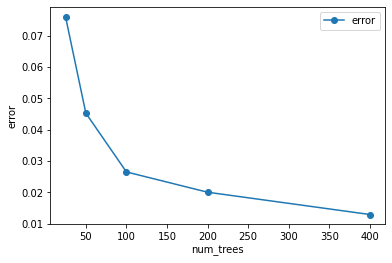

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Creating the plot
ax = error_df.plot(marker='o')

ax.set(ylabel='error')

## Question 4

* Using a grid search with cross-validation, fit a new gradient boosted classifier with the a list of estimators, similar to question 3. Also consider  varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
* Examine the parameters of the best fit model.
* Calculate relevant error metrics on this model and examine the confusion matrix.

**Note:** this question may take some time to execute, depending on how many features are associated with the grid search. It is recommended to start with only a few to ensure everything is working correctly and then add more features. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

In [42]:
from sklearn.model_selection import GridSearchCV

#Create estimator instance
gbc1 = GradientBoostingClassifier(max_features=4,
                                    random_state=42)

#Parameters we are using in gridsearch
parameters = {'learning_rate': [0.1, 0.01, 0.001], 
              'subsample': [0.5, 1.0], 
              'n_estimators': [25, 50, 100, 200, 400]}

#Creating and fitting Grid Search instance
gbc_gs = GridSearchCV(gbc1, parameters, scoring='accuracy')
gbc_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [25, 50, 100, 200, 400],
                         'subsample': [0.5, 1.0]},
             scoring='accuracy')

In [45]:
print(gbc_gs.best_params_)
print(gbc_gs.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 400, 'subsample': 0.5}
GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)


In [46]:
from sklearn.metrics import classification_report

y_pred_gbcgs = gbc_gs.predict(X_test)
print(classification_report(y_test, y_pred_gbcgs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.98      0.96      0.97       563
           2       0.97      0.98      0.97       547
           3       1.00      1.00      1.00       539
           4       1.00      0.99      0.99       420
           5       0.99      0.99      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



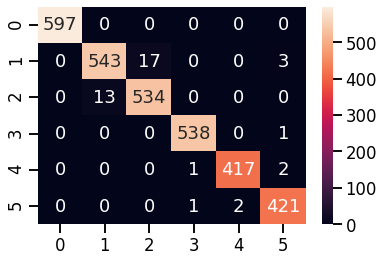

In [47]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_gbcgs)
ax = sns.heatmap(cm, annot=True, fmt='d')

## Question 5

* Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
* Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

**NOTE:** Setting `max_features=4` in the decision tree classifier used as the base classifier for AdaBoost will increase the convergence rate.

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Create decision tree instance
dc = DecisionTreeClassifier(max_features=4, random_state=42)

#Create AdaBoost model instance
ada = AdaBoostClassifier(dc, random_state=42)

#Parameters
parameters = {'learning_rate': [0.1, 0.01, 0.001], 
              'n_estimators': [100, 115, 125, 150, 175, 200]}

# Create GridSearvhCV instance
ada_gs = GridSearchCV(ada, parameters, scoring='accuracy')
ada_gs.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4,
                                                                                random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 115, 125, 150, 175, 200]},
             scoring='accuracy')

In [51]:
ada_gs.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [52]:
#Predict
y_pred_ada = ada_gs.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       597
           1       0.70      0.69      0.69       563
           2       0.70      0.75      0.72       547
           3       0.90      0.87      0.88       539
           4       0.83      0.85      0.84       420
           5       0.83      0.85      0.84       424

    accuracy                           0.80      3090
   macro avg       0.81      0.81      0.81      3090
weighted avg       0.80      0.80      0.80      3090



## Question 6

* Fit a logistic regression model with regularization. This can be a replica of a model that worked well in the exercises from week 4.
* Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both) from questions 4 and 5.
* Determine the error as before and compare the results to the appropriate gradient boosted model(s).
* Plot the confusion matrix for the best model created in this set of exercises.

In [55]:
from sklearn.linear_model import LogisticRegressionCV

#Create logistic instance
lr_l2 = LogisticRegressionCV(penalty='l2', Cs=5, cv=4, max_iter=2000, solver='newton-cg').fit(X_train, y_train)

#Prediction
y_pred_lr = lr_l2.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.96      0.95      0.95       563
           2       0.96      0.96      0.96       547
           3       1.00      1.00      1.00       539
           4       1.00      1.00      1.00       420
           5       0.99      1.00      0.99       424

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



In [57]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr_l2', lr_l2), ('gbc_gs', gbc_gs)]

#Creating VotingClassifier instance
vc = VotingClassifier(estimators, voting='soft')
vc = vc.fit(X_train, y_train)

In [58]:
#Predict
y_pred_vc = vc.predict(X_test)
print(classification_report(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.97      0.96      0.97       563
           2       0.97      0.96      0.97       547
           3       0.99      1.00      1.00       539
           4       1.00      1.00      1.00       420
           5       0.99      1.00      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



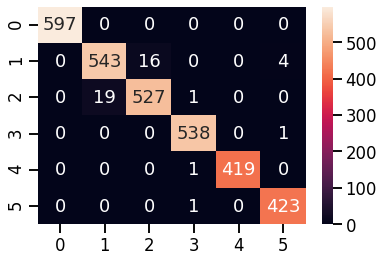

In [59]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_vc)
ax = sns.heatmap(cm, annot=True, fmt='d')